@github:fengyuyun https://github.com/fengwuyun

参考代码：https://github.com/fengdu78/lihang-code
    
增加了部分函数的实现和注释

## 第一章 统计学习方法概论 

In [2]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#设置随机种子，保证每次产生固定的随机数
np.random.seed(222)

In [4]:
#np.poly1d ： https://www.cnblogs.com/zhouzhe-blog/p/9621679.html

In [5]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(w, x):
    if type(w) == np.matrix:
        w = np.array(w.flatten()[:1])[0]
    f = np.poly1d(w)
    return f(x)

# 残差
def residuals_func(w, x, y):
    ret = fit_func(w, x) - y
    return ret

In [7]:
# [0,1)之间产生十个点
#np.linespace https://blog.csdn.net/Asher117/article/details/87855493
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]

In [8]:
#x (10,) 十个(0,1)之间的采样点的横坐标
#x_points (1000,) 一千个(0,1)之间的采样点的横坐标，用于绘制曲线
#y_ (10,) 十个(0,1)之间的采样点的横坐标对应的真实纵坐标
#y (10,) 增加了噪声的纵坐标


# 十个点
#np.linespace https://blog.csdn.net/Asher117/article/details/87855493
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]


def fitting(M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    #leastsq(误差计算函数， 初始值，)
    #计算的结果p_lsq是一个包含两个元素的元组，第一个元素是一个数组，表示拟合后的参数k、b；
    #第二个元素如果等于1、2、3、4中的其中一个整数，则拟合成功，否则将会返回mesg。
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    #绘制真实曲线
    plt.plot(x_points, real_func(x_points), label='real')
    #绘制拟合曲线
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    #绘制采样点
    plt.plot(x, y, 'bo', label='noise')
    #显示曲线标签
    plt.legend()
    
    return p_lsq

Fitting Parameters: [-0.01927376]


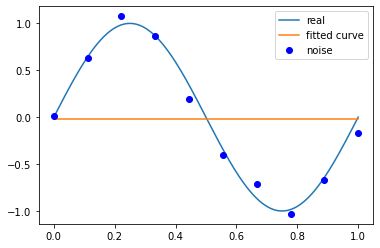

In [9]:
# M=0 0次多项式
p_lsq_0 = fitting(M=0)

Fitting Parameters: [-1.44548231  0.70346739]


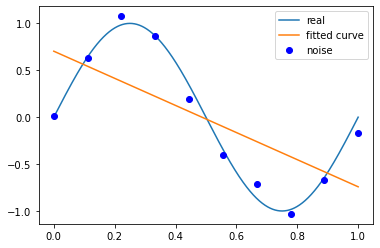

In [10]:
# M=1
p_lsq_1 = fitting(M=1)

Fitting Parameters: [ 1.99216403e+01 -3.00954251e+01  1.01056011e+01 -1.67322235e-02]


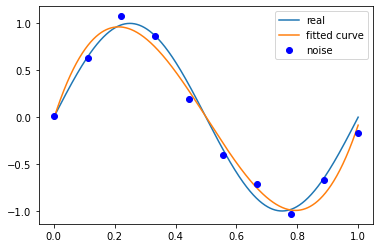

In [11]:
# M=3
p_lsq_3 = fitting(M=3)

Fitting Parameters: [-7.43689913e+03  3.00864363e+04 -5.03549804e+04  4.54134119e+04
 -2.42682708e+04  8.06121418e+03 -1.68976092e+03  1.91603912e+02
 -2.93044472e+00  1.13188502e-02]


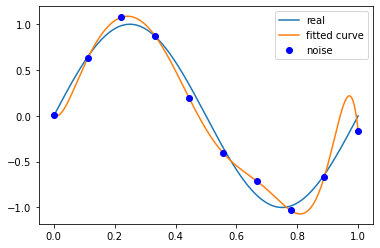

In [12]:
# M=9
p_lsq_9 = fitting(M=9)

当M=9时，多项式曲线通过了每个数据点，但是造成了过拟合

### 正则化

#### L1正则化

#### L2正则化

结果显示过拟合，引入正则项(regularizer)，降低过拟合     

${Q(x) = \sum^n_{i=1}(h(x_i)-y_i)^2+ \lambda||w||^2}$    

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

In [13]:
regularization = 0.0001


def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(
        0.5 * regularization * np.square(p)))  # L2范数作为正则化项
    return ret

In [14]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))

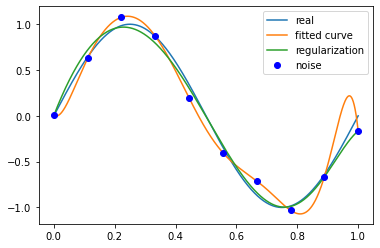

In [15]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func(p_lsq_regularization[0], x_points),
    label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()
plt.show()